# Parameters fitting 

In [5]:
%config InlineBackend.figure_format = "retina"
import asteca as asteca
#import asteca
import pandas as pd
import pyabc
import numpy as np
import os
import tempfile
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Dias_Members_Final.csv')

In [25]:
df

,Cluster,source_id,umag,e_umag,bmag,e_bmag,vmag,e_vmag,imag,e_imag,Pmemb,plx,umag-bmag,bmag-vmag,vmag-imag,e_umag-bmag,e_bmag-vmag,e_vmag-imag
0,ASCC_107,1827667708716069888,NaN,NaN,17.899805,0.012637,16.470982,0.004639,14.758207,0.002583,0.2,1.128348,NaN,1.428823,1.712775,NaN,0.013462,0.005310
1,ASCC_107,1827758242309600768,NaN,NaN,19.315634,0.033406,17.817370,0.009333,16.003910,0.004823,0.1,1.013746,NaN,1.498264,1.813460,NaN,0.034685,0.010505
2,ASCC_107,1827766836564960896,15.303563,0.021793,14.791051,0.004307,13.796532,0.002335,12.581832,0.001244,0.3,1.254182,0.512512,0.994519,1.214700,0.022215,0.004899,0.002646
3,ASCC_107,1827762816475789312,15.866933,0.028557,15.370125,0.004357,14.461844,0.002552,13.341768,0.001439,0.3,1.000952,0.496808,0.908281,1.120076,0.028888,0.005049,0.002930
4,ASCC_107,1827759861538212864,NaN,NaN,15.884212,0.004867,14.827855,0.002669,13.558452,0.001513,0.2,1.102869,NaN,1.056357,1.269403,NaN,0.005551,0.003069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227008,vdBergh_80,3003041962294457088,NaN,NaN,16.969862,0.009516,15.624284,0.003396,13.938666,0.001734,0.9,0.990200,NaN,1.345578,1.685618,NaN,0.010104,0.003813
227009,vdBergh_80,3002975235682846336,NaN,NaN,NaN,NaN,18.290815,0.018570,15.970864,0.008788,0.8,0.983382,NaN,NaN,2.319951,NaN,NaN,0.020544
227010,vdBergh_80,3003028115319899008,NaN,NaN,17.167383,0.009202,15.903686,0.003605,14.232873,0.001922,1.0,1.030879,NaN,1.263697,1.670813,NaN,0.009883,0.004086
227011,vdBergh_80,3003001864479857920,NaN,NaN,NaN,NaN,19.040833,0.025013,16.012733,0.005228,0.7,0.955514,NaN,NaN,3.028100,NaN,NaN,0.025553


In [30]:
len(df[df['umag'] > 14])/len(df[df['umag'] < 14])

3.3250048990789733

In [31]:
len(df[df['umag'] < 14])

10206

In [32]:
len(df[df['umag'] > 14])

33935

In [15]:
df['e_umag-bmag'][df['e_umag'] < 14]

2         0.022215
3         0.028888
8         0.022078
13        0.017329
14        0.025868
            ...   
226980    0.009752
226982    0.031751
226992    0.023119
226994    0.014979
226999    0.023622
Name: e_umag-bmag, Length: 44141, dtype: float64

General Code

In [22]:
# Load isochrones
isochs = asteca.isochrones(
    model='parsec',
    isochs_path=r"isocronas_UBVRI_idades_6.5-10.dat",
    magnitude="Vmag",
    color2=("Bmag", "Vmag"),
    color=("Vmag", "Imag"),
    magnitude_effl=5490.56,
    color2_effl=(4385.92, 5490.56),
    color_effl=(5490.56, 8059.88)
)
# Synthetic clusters parameters
synthcl = asteca.synthetic(isochs, seed=457304)

def model(fit_params):
    """Generate synthetic cluster. pyABC expects a dictionary from this
    function, so we return a dictionary with a single element.
    """
    synth_clust = synthcl.generate(fit_params)
    synth_dict = {"data": synth_clust}
    return synth_dict

def distance(synth_dict, _):
    """The likelihood returned works as a distance which means that the optimal
    value is 0.0.
    """
    return likelihood.get(synth_dict["data"])

# Calibrate the `synthcl` object
fix_params = {"alpha": 0.09, "beta": 0.94, "Rv": 3.1, "DR": 0., "met":0.0152}
#alpha - scaling factor for mass distribuition
#beta - factor for the luminosity function
#Rv - Extintion coefficient fo interstellar dust
#DR - Distance residual offset
#met - metallicity



Instantiating isochrones...
Isochrone object generated

Instantiating synthetic...
Synthetic clusters object generated


In [23]:
#All cluster of the Dias catalogue with less than 150 Myr and less than 1kpc away
todos_df = pd.read_csv(r'junk/Dias_Members_1kpc_150_FINAL.csv')
todos_df = todos_df.sort_values('angular_distance', ascending=True).drop_duplicates('dr2_source_id').sort_index()

#Select the cluster
cluster = "ASCC_32"
cluster_df = todos_df[todos_df["Cluster"] == cluster]

#Filter Pmemb
pmemb = cluster_df["Pmemb"] > 0.5
cluster_df = cluster_df[pmemb]

In [24]:
cluster_df['vmag-imag'] = cluster_df['vmag'] - cluster_df['imag']
cluster_df['e_vmag-imag'] = 0.01 * cluster_df['vmag']

In [25]:
my_cluster = asteca.cluster(
    obs_df=cluster_df,
    magnitude="vmag",
    e_mag="e_vmag",
    color2="bmag-vmag",
    e_color2='e_bmag-vmag',
    color="vmag-imag",
    e_color='e_vmag-imag',
)


Instantiating cluster...
Cluster object generated


In [26]:
synthcl.calibrate(my_cluster, fix_params)

In [27]:
# Instantiate the likelihood
likelihood = asteca.likelihood(my_cluster, compute_l='cmd_ccd')


Likelihood object generated


In [28]:
loga_min, loga_max = [6.5, 8.5] #~3Myr - 320Myr
av_min, av_max = [0.0, 2.0]
paralaxe = np.median(cluster_df["plx"])
dm = -5*np.log10(paralaxe) + 10 # +15 - 5 pq está em mas
dm = round(dm, 3)
print("O valor de dm é:", dm)

# Define a pyABC Distribution(). Uniform distributions are employed for all the parameters
# here but the user can of course change this as desired. See the pyABC docs for more
# information.
priors = pyabc.Distribution(
    {
        "loga": pyabc.RV("uniform", loga_min, loga_max - loga_min),
        "Av": pyabc.RV("uniform", av_min, av_max - av_min),
        "dm": pyabc.RV("norm", float(dm), 0.1*dm)
    }
)

# Define pyABC parameters
pop_size = 100
abc = pyabc.ABCSMC(
    model,
    priors,
    distance,
    population_size=pop_size
)

# This is a temporary file required by pyABC
db_path = "sqlite:///" + os.path.join(tempfile.gettempdir(), "pyABC.db")
abc.new(db_path)

history = abc.run(minimum_epsilon=0.01, max_nr_populations=50)

ABC.Sampler INFO: Parallelize sampling on 32 processes.


O valor de dm é: 9.505


ABC.History INFO: Start <ABCSMC id=96, start_time=2025-03-27 13:24:47>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 1.58930494e-01.
ABC INFO: Accepted: 100 / 203 = 4.9261e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 1.07337731e-01.
ABC INFO: Accepted: 100 / 188 = 5.3191e-01, ESS: 9.1289e+01.
ABC INFO: t: 2, eps: 9.42910002e-02.
ABC INFO: Accepted: 100 / 243 = 4.1152e-01, ESS: 7.5677e+01.
ABC INFO: t: 3, eps: 7.64864879e-02.
ABC INFO: Accepted: 100 / 259 = 3.8610e-01, ESS: 8.7114e+01.
ABC INFO: t: 4, eps: 5.98820033e-02.
ABC INFO: Accepted: 100 / 284 = 3.5211e-01, ESS: 8.6870e+01.
ABC INFO: t: 5, eps: 4.95099296e-02.
ABC INFO: Accepted: 100 / 337 = 2.9674e-01, ESS: 7.5065e+01.
ABC INFO: t: 6, eps: 4.23360598e-02.
ABC INFO: Accepted: 100 / 435 = 2.2989e-01, ESS: 9.1626e+01.
ABC INFO: t: 7, eps: 3.72735935e-02.
ABC INFO: Accepted: 100 / 366 = 2.7322e-01, ESS: 7.9425e+01.
ABC INFO: t: 8, eps: 3.43183231e-02.
ABC INFO: Accepted: 100 / 363 = 2.7548e-01, ESS: 6.3454e+01.
ABC INFO: 

In [29]:
final_dist = pyabc.inference_util.eps_from_hist(history)
print("Final minimized distance: {:.2f} ({:.0f}%)".format(final_dist, 100*final_dist))

# Extract last iteration and weights
df, w = history.get_distribution()

ESS = pyabc.weighted_statistics.effective_sample_size(w)
print("Effective sample size: {:.0f}".format(ESS))

print("\nParameters estimation:")
print("----------------------")
for k in df.keys():
    _median = pyabc.weighted_statistics.weighted_median(df[k].values, w)
    _std = pyabc.weighted_statistics.weighted_std(df[k].values, w)
    print("{:<5}: {:.3f} +/- {:.3f}".format(k, _median, _std))


Final minimized distance: 0.02 (2%)
Effective sample size: 62

Parameters estimation:
----------------------
Av   : 0.335 +/- 0.000
dm   : 9.716 +/- 0.000
loga : 7.350 +/- 0.000


array([[<Axes: ylabel='Av'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='dm'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='Av', ylabel='loga'>, <Axes: xlabel='dm'>,
        <Axes: xlabel='loga'>]], dtype=object)

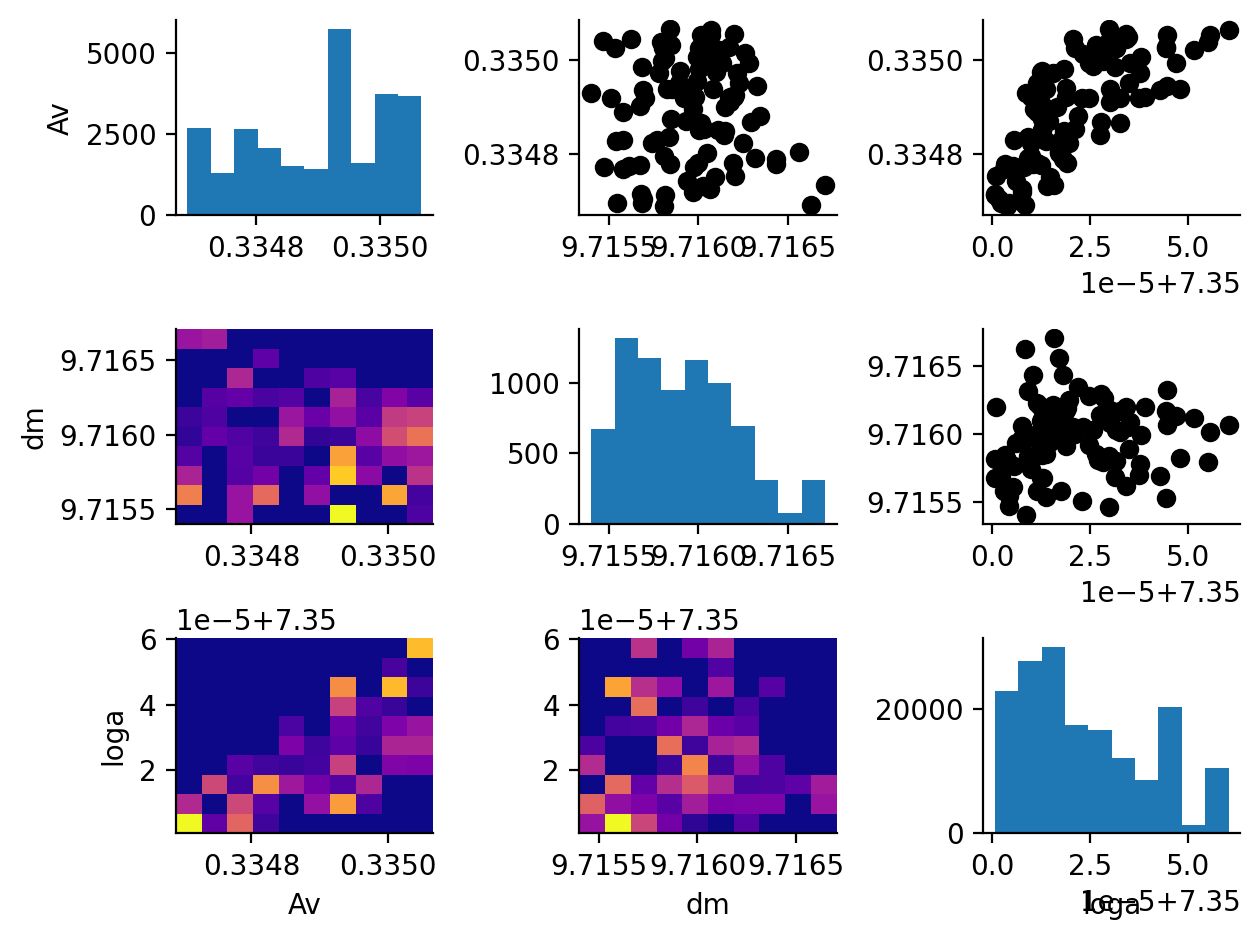

In [30]:
pyabc.settings.set_figure_params("pyabc")  # for beautified plots

# Matrix of 1d and 2d histograms over all parameters
pyabc.visualization.plot_histogram_matrix(history)

array([<Axes: title={'center': 'Parameter Av'}, ylabel='Av'>,
       <Axes: title={'center': 'Parameter dm'}, ylabel='dm'>,
       <Axes: title={'center': 'Parameter loga'}, xlabel='Population t', ylabel='loga'>],
      dtype=object)

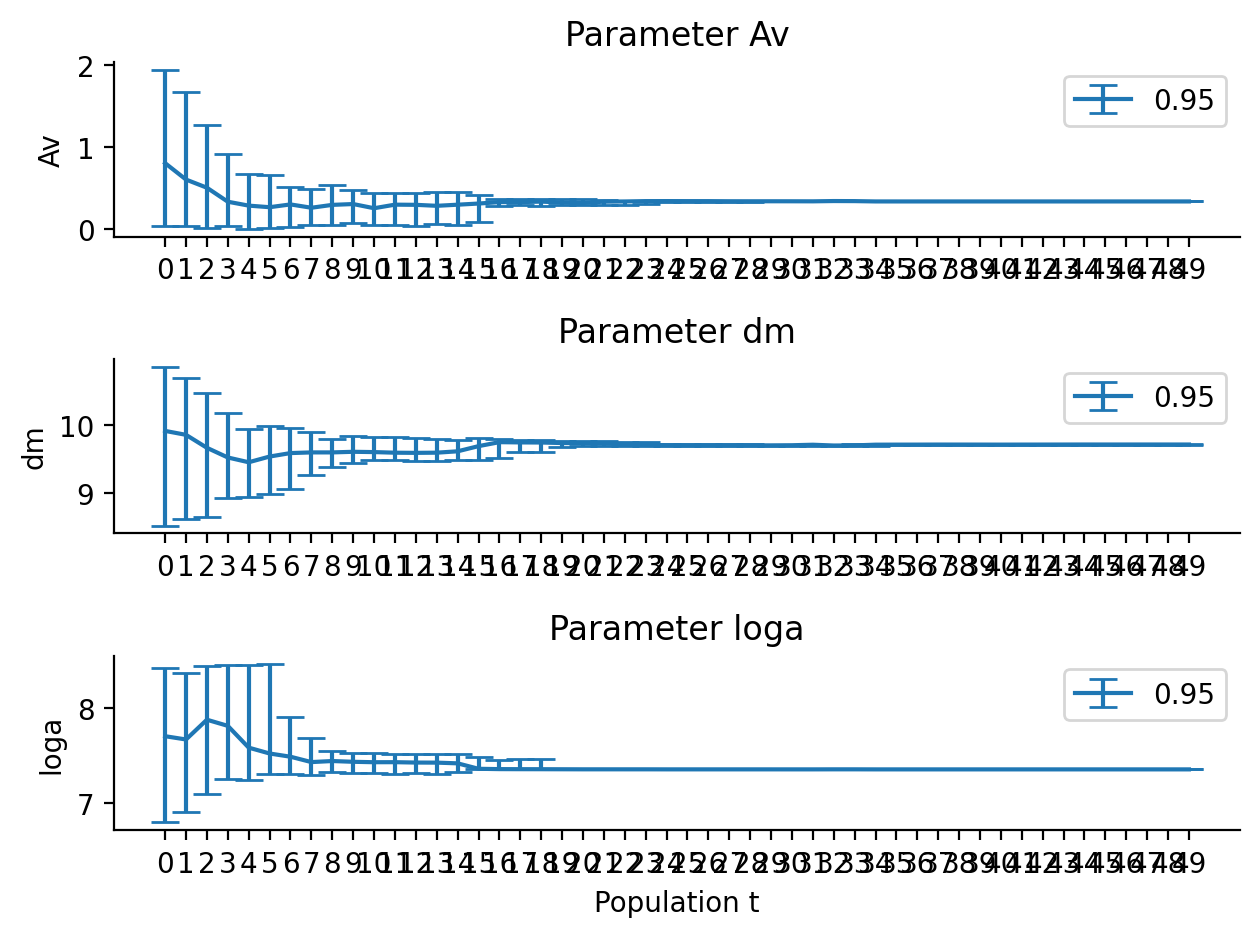

In [31]:
# Credible intervals over time
pyabc.visualization.plot_credible_intervals(history)

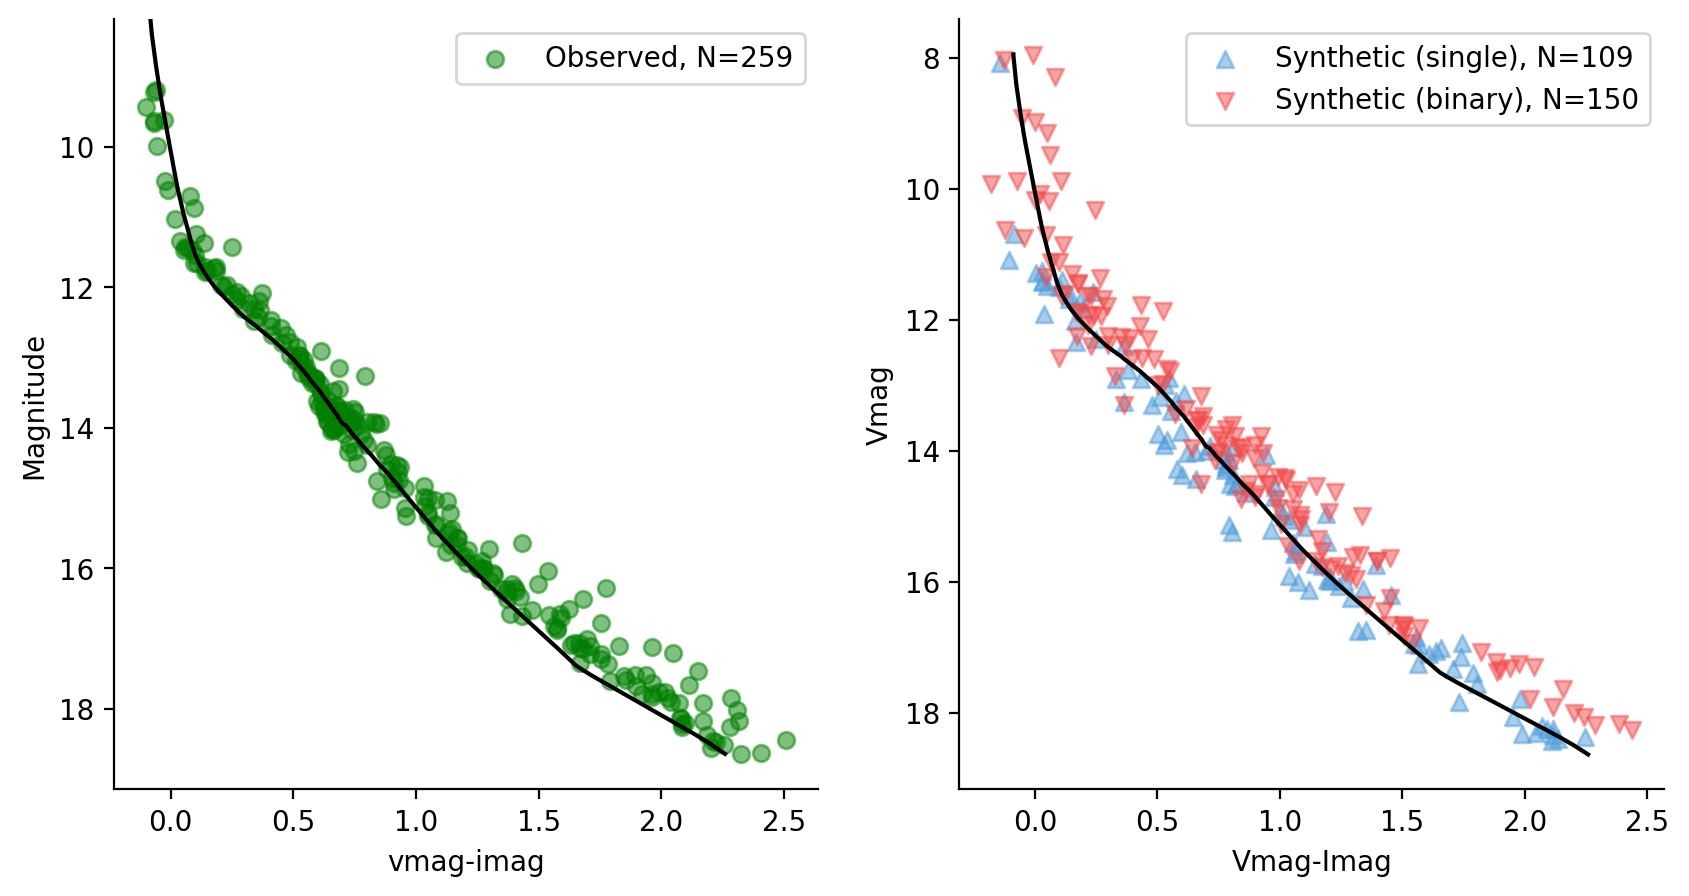

In [32]:
# Extract medians for the fitted parameters
fit_params = {
    k: pyabc.weighted_statistics.weighted_median(df[k].values, w) for k in df.keys()
}

import matplotlib.pyplot as plt

iso_final = asteca.plot.get_isochrone(synthcl, fit_params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
asteca.plot.cluster(my_cluster, ax1, col_plot="cmd")
ax1.plot(iso_final[1,:], iso_final[0,:], color='black')
asteca.plot.synthetic(synthcl, ax2, fit_params, iso_final)
plt.show()

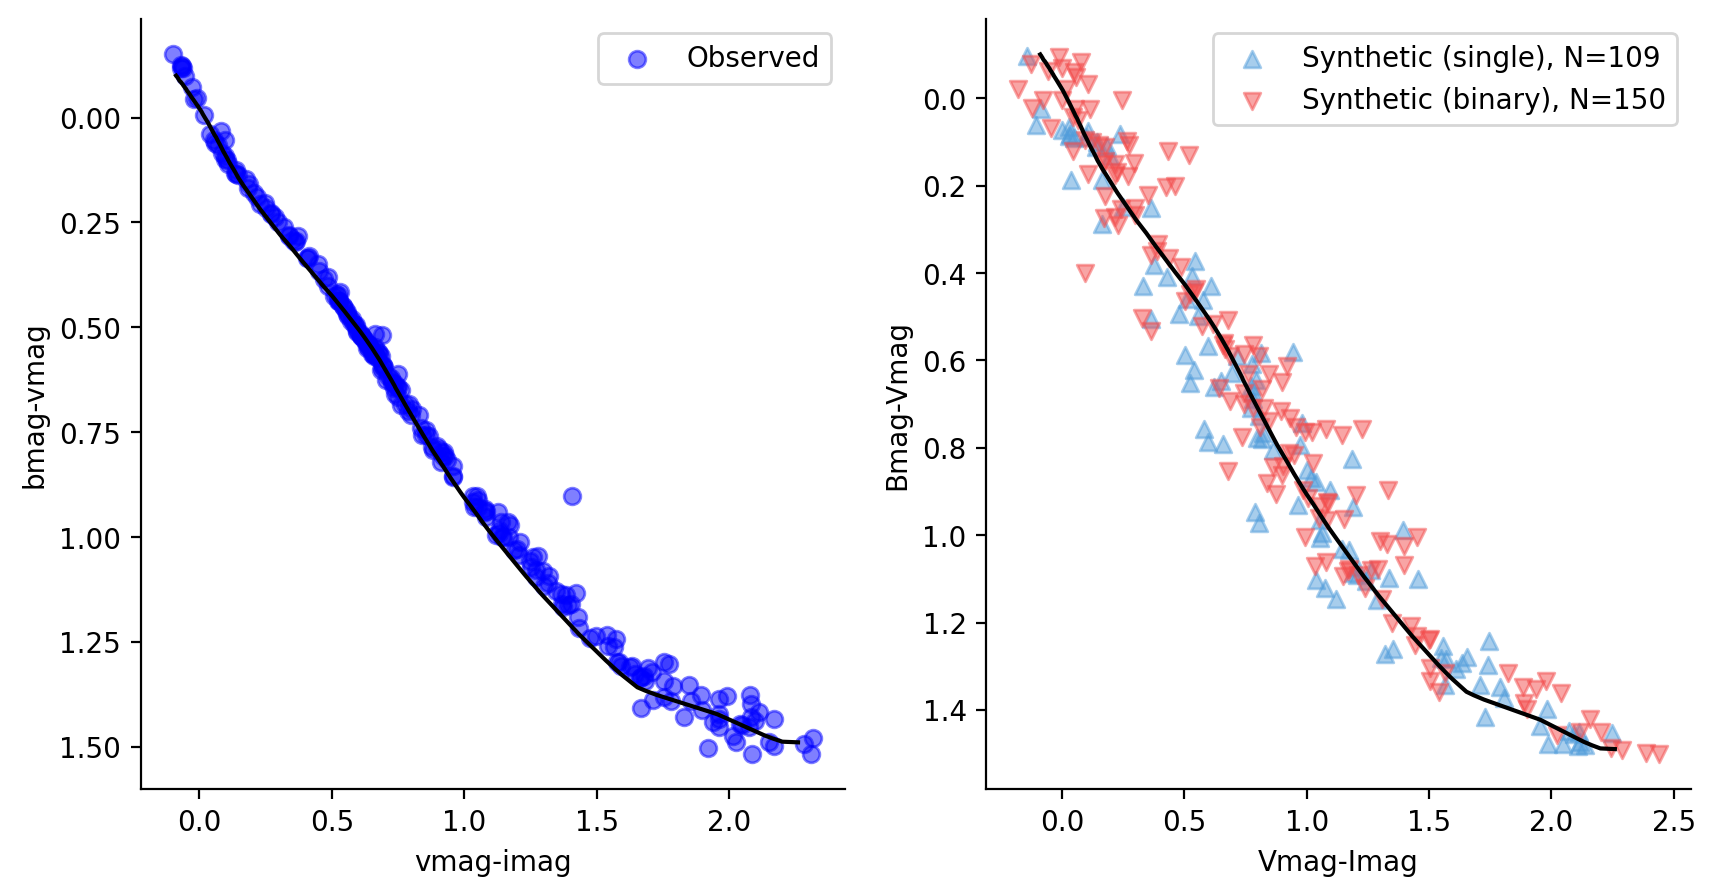

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
asteca.plot.cluster(my_cluster, ax1, col_plot="ccd")
ax1.plot(iso_final[1,:], iso_final[2,:], color='black')
asteca.plot.synthetic(synthcl, ax2, fit_params, iso_final, col_plot="ccd")
plt.show()

In [2]:
import numpy as np
np.sqrt(np.nan**2 + 0.2**2)

nan